In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from mutedpy.experiments.streptavidin.streptavidin_loader import tobias_colors

In [2]:
os.getcwd()

'/home/mojko/Documents/PhD_Projects/protein-design-pet/notebooks/streptavidin-final-plots/enrichment_plots'

In [3]:
df = pd.read_csv("../../../mutedpy/experiments/streptavidin/subsampling/subsampling.csv")

In [4]:
df.loc[0:len(df)-3,'fraction'] = np.round(df.loc[0:len(df)-3,'fraction'].values.astype(float),1)

In [5]:
df

,Unnamed: 0,fraction,error,hit_rate
0,0,0.1,0.376531,0.023102
1,1,0.1,0.164775,0.264026
2,2,0.1,0.146018,0.009901
3,3,0.1,0.467404,0.023102
4,4,0.1,0.140060,0.198020
...,...,...,...,...
197,197,1.0,0.159655,0.214521
198,198,1.0,0.131695,0.181518
199,199,1.0,0.129938,0.122112
200,200,Initial,0.079465,0.201320


In [6]:
df

,Unnamed: 0,fraction,error,hit_rate
0,0,0.1,0.376531,0.023102
1,1,0.1,0.164775,0.264026
2,2,0.1,0.146018,0.009901
3,3,0.1,0.467404,0.023102
4,4,0.1,0.140060,0.198020
...,...,...,...,...
197,197,1.0,0.159655,0.214521
198,198,1.0,0.131695,0.181518
199,199,1.0,0.129938,0.122112
200,200,Initial,0.079465,0.201320


In [7]:
#df.loc['subsampling'] = 'Initial Screening'

In [8]:
df.loc[0:200,'subsampling'] = 'Initial Screening'

In [9]:
df.loc[200,'subsampling'] = 'Actual'
df.loc[200,'fraction'] = 1.0

df.loc[201,'subsampling'] = 'Hits'
df.loc[201,'fraction'] = 'Hits'
df['fraction2'] = [str(a) for a in df['fraction'].values]

df.loc[201,'hit_rate'] = df.loc[201,'hit_rate']


In [10]:
new_row = pd.Series([100, 'Post Exp. (1.2)', 0, 0.48, 'Actual', "NA"], index=df.columns)
#exchange the last two rows 
df = df.append(new_row, ignore_index=True)

/tmp/ipykernel_12225/795279260.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [11]:
last_two_rows = df.iloc[-2:]

# Reverse the order of the last two rows
reversed_last_two_rows = last_two_rows.iloc[::-1]

# Drop the last two rows from the original DataFrame and append the reversed rows
df = pd.concat([df.iloc[:-2], reversed_last_two_rows]).reset_index(drop=True)


In [12]:
df

,Unnamed: 0,fraction,error,hit_rate,subsampling,fraction2
0,0,0.1,0.376531,0.023102,Initial Screening,0.1
1,1,0.1,0.164775,0.264026,Initial Screening,0.1
2,2,0.1,0.146018,0.009901,Initial Screening,0.1
3,3,0.1,0.467404,0.023102,Initial Screening,0.1
4,4,0.1,0.140060,0.198020,Initial Screening,0.1
...,...,...,...,...,...,...
198,198,1.0,0.131695,0.181518,Initial Screening,1.0
199,199,1.0,0.129938,0.122112,Initial Screening,1.0
200,200,1.0,0.079465,0.201320,Actual,1.0
201,100,Post Exp. (1.2),0.000000,0.480000,Actual,NA


In [13]:
df['Source'] = df['subsampling']

In [14]:
palette = {'Initial Screening':tobias_colors['RED'],'Actual':tobias_colors['GREEN'],'Random':'tab:purple'}
palette = {'Initial Screening':tobias_colors['RED'],'Actual':tobias_colors['GREEN'],'Hits':'tab:purple'}

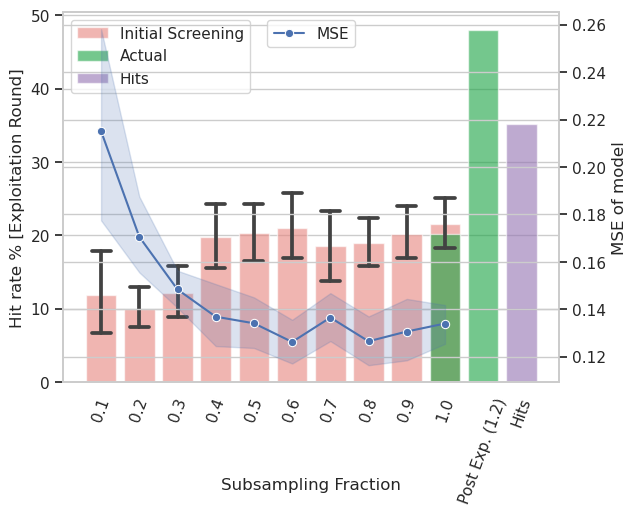

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
fig, ax1 = plt.subplots()

# Plot the barplot (catplot) on ax1.
# Create a second y-axis that shares the same x-axis as ax1.
df['hit_rate'] = df['hit_rate']*100
df.loc[0:200,'fraction'] = df.loc[0:200,'fraction']
g = sns.barplot(
    data=df, 
    x="fraction", y="hit_rate", hue = 'Source', palette=palette, alpha=.6, ax = ax1, capsize= 0.5, linewidth = 1, dodge =False)

xlabel = plt.xlabel("Subsampling Fraction")
#plt.ylabel("Hit rate % [Exploitation Round]")
plt.ylabel("Hit rate % [Exploitation Round]")
#xlabel.set_position((70,70))
#ax1.spines['bottom'].set_position(('outward', -20))
plt.xticks(rotation=70)
ax1.set_xlabel("Subsampling Fraction", labelpad=-20)
plt.legend(loc = 'upper left')
ax2 = ax1.twinx()
sns.lineplot(data=df.head(200), x="fraction2", y="error", ax = ax2, label = 'MSE', marker = 'o')
plt.legend(loc = 'upper center',)
plt.ylabel("MSE of model")
plt.savefig("subsampling_hit_rate.pdf",dpi = 200,bbox_inches='tight')
#plt.show()

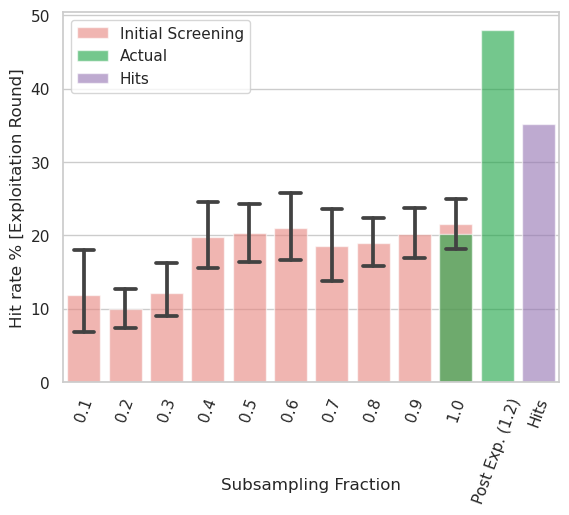

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
fig, ax1 = plt.subplots()

# Plot the barplot (catplot) on ax1.
# Create a second y-axis that shares the same x-axis as ax1.
#df['hit_rate'] = df['hit_rate']*100
df.loc[0:200,'fraction'] = df.loc[0:200,'fraction']
g = sns.barplot(
    data=df, 
    x="fraction", y="hit_rate", hue = 'Source', palette=palette, alpha=.6, ax = ax1, capsize= 0.5, linewidth = 1, dodge =False)

xlabel = plt.xlabel("Subsampling Fraction")
#plt.ylabel("Hit rate % [Exploitation Round]")
plt.ylabel("Hit rate % [Exploitation Round]")
#xlabel.set_position((70,70))
#ax1.spines['bottom'].set_position(('outward', -20))
plt.xticks(rotation=70)
ax1.set_xlabel("Subsampling Fraction", labelpad=-20)
plt.legend(loc = 'upper left')

# ax2 = ax1.twinx()
# sns.lineplot(data=df.head(200), x="fraction2", y="error", ax = ax2, label = 'MSE', marker = 'o')
# plt.legend(loc = 'upper left')
# plt.ylabel("MSE of model")
plt.savefig("subsampling_hit_rate_solo.png",dpi = 200,bbox_inches='tight')
#plt.show()